In [1]:
# importing MNIST Dataset
from keras.datasets import mnist
# import plot, random for visual improvement
import matplotlib.pyplot as plt
import random

# import keras stuff
import numpy as np
import tensorflow as tf
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Using TensorFlow backend.
/home/uumuunnuu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/uumuunnuu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/uumuunnuu/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/uumuunnuu/anaconda3/lib/python3.7/site-pa

In [2]:
# Load MNIST Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train.shape: {}, y_train.shape: {} \n x_test.shape: {}, y_test.shape: {}'
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

x_train.shape: (60000, 28, 28), y_train.shape: (60000,) 
 x_test.shape: (10000, 28, 28), y_test.shape: (10000,)


Index: 29306, Number: 8
Index: 23621, Number: 7
Index: 3078, Number: 2
Index: 44536, Number: 7


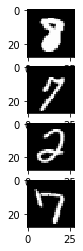

In [3]:
for i in range(0,4):
    k = 411+i
    plt.subplot(k)
    index = random.randrange(0, x_train.shape[0])
    plt.imshow(x_train[index], cmap=plt.get_cmap('gray'))
    print('Index: {}, Number: {}'.format(index, y_train[index]))

In [4]:
# Reshape 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train = x_train/255
x_test = x_test/255
x_train.shape

(60000, 28, 28, 1)

In [5]:
# Add Layers
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, kernel_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model2 = Sequential()
model2.add(Conv2D(50, kernel_size=(3,3), input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(50, kernel_size=(2,2)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation=tf.nn.softmax))



# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Check Layers
model.summary()
model2.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 50)        500       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 50)        10050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 50)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6, 128)         6528      
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
____________________

In [6]:
# Fit
model.fit(x = x_train, y = y_train, shuffle = True, epochs = 5)
model2.fit(x = x_train, y = y_train, shuffle=True, epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1449 - acc: 0.9551
Epoch 2/5
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0544 - acc: 0.9831
Epoch 3/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0408 - acc: 0.9871
Epoch 4/5
60000/60000 [==============================] - 105s 2ms/step - loss: 0.0322 - acc: 0.9899
Epoch 5/5
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0260 - acc: 0.9918
Epoch 1/5
60000/60000 [==============================] - 98s 2ms/step - loss: 0.1408 - acc: 0.9564
Epoch 2/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0553 - acc: 0.9840
Epoch 3/5
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0453 - acc: 0.9874
Epoch 4/5
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0397 - acc: 0.9883
Epoch 5/

In [7]:
# Evaluate
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 6s 645us/step


[0.03705961157109196, 0.989]

In [8]:
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 528us/step


[0.04504645950924823, 0.9887]